# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Fabio Rizzi              | RM 336656      | `11IA` |
| Jurandir Ventura         | RM 336634      | `11IA` |
| Marcelo Preto            | RM 336632      | `11IA` |
| Thiago Alexandre         | RM 336583      | `11IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

In [1]:
from IPython.display import Markdown, display
import os

display(Markdown("<span style='color:blue'>**Resposta:**</span>"))
display(Markdown("Para treino e validação, foram usadas as seguintes quantidades de imagens para cada classe:"))

classes = ['viral','bacteria','controle']
main_directory = ['raiox/train']

def count_files(dir):
    _, _, files = next(os.walk(dir))
    return len(files)

for classe in classes:
    qtd = 0
    for dir in main_directory:
        qtd = qtd + count_files(dir + "/" + classe)
    display(Markdown(("**" + classe + "**: " + str(qtd) + " imagens")))
    

play_directory = ['raiox/test']
print()

display(Markdown("Para fins de demonstração, podemos ainda usar a quantidade de imagens abaixo, que está no diretório raiox/test:"))

for classe in classes:
    qtd = 0
    for dir in play_directory:
        qtd = qtd + count_files(dir + "/" + classe)
    display(Markdown(("**" + classe + "**: " + str(qtd) + " imagens")))

<span style='color:blue'>**Resposta:**</span>

Para treino e validação, foram usadas as seguintes quantidades de imagens para cada classe:

**viral**: 237 imagens

**bacteria**: 3517 imagens

**controle**: 1342 imagens

Para fins de demonstração, podemos ainda usar a quantidade de imagens abaixo, que está no diretório raiox/test:

**viral**: 149 imagens

**bacteria**: 242 imagens

**controle**: 234 imagens

## 4.2 Componentes obrigatórios

Este projeto requer a instalação dos seguintes componentes, via ```conda install```:

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [2]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras.applications import VGG16, VGG19
from keras.applications import Xception
from keras.applications.xception import preprocess_input
from keras.applications.resnet50 import preprocess_input
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

In [3]:
## IMPLEMENTE

# Essa é a porção que será usada para validação. Tais imagens estão no mesmo diretório raiox/train/
# A função ImageDataGenerator do Keras fará essa seleção de forma automática nas próximas linhas de código.
# O diretório raiox/train foi construído com as 3 classes a serem analisadas localmente, mas podem ser acessados em:
# https://drive.google.com/drive/folders/1NtI4-0I_2YS1wBPcjvnHIhD1mEmYwSDJ?usp=sharing

divisao_treino_validacao = 0.35

In [4]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 3312 images belonging to 3 classes.


In [5]:
val_generator = train_datagen.flow_from_directory(
    "raiox/train/",
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 1781 images belonging to 3 classes.


In [6]:
train_generator.class_indices, val_generator.class_indices

({'bacteria': 0, 'controle': 1, 'viral': 2},
 {'bacteria': 0, 'controle': 1, 'viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [7]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

### A ResNet50 é uma rede neural convolucional (CNN) que usa 50 camadas convolucionais, sendo distribuídas em 5 etapas, com  convolução da rede. É um modelo pré-treinado e possui a sequência de camadas descritas abaixo:

* Primeiro com um convolução de tamanho 7 x 7, com de kernel 64 e saltos de 2, formando uma camada.

* Na próxima convolução temos o tamanho 1 x 1 de 64 kernel, seguido de 3 x 3 com 64 e por último 1 x 1 de 256. Essas 3 camadas são repetidas 3 vezes e por isso formam 9 camadas nesta etapa.

* Na próxima vemos um kernel de 1 x 1 de 128, depois 3 x 3 de 128 e por fim, 1 x 1 de 512, sendo repetido por 4 vezes e assim formam mais 12 camadas (3 * 4) neste passo.

* Depois temos um kernel de 1 x 1 de 256, depois 3 x 3 de 256 e 1 x 1 de 1024, repetido 6 vezes, formando mais 18 camadas nesta etapa.

* Na última camada de convolução temos kernel de 1 x 1 de 512, 3 x 3 de 512 e 1 x 1 de 2048, repetidos por 3 vezes e formando mais 9 camadas.

* Por fim temos uma camada totalmente conectada no final, formando mais uma camada e assim totalizando as 50 camadas.

1 + 9 + 12 + 18 + 9 + 1 = 50 camadas.

A Arquitetura pode ser melhor entendida pela figura abaixo:

<p align="center">
<img src="imagens/resnet50.jpg" height="50%" width="50%">
</p>

### PRÓS:
A Resnet50 funciona bem para classificação de imagens e detecção de objetos. Tem a vantagem de usar o melhor resultado, mesmo executando uma camada de pior resultado posterior, com uso do método "Skip Connection", trazendo para a saída resultados de camadas anteriores, assim elimina o problema de redução ou desaparecimento de gradiente.

### CONTRA:
Por usar modelo pré-treinado, exige menos poder computacional, em contrapartida é limitado se for usado para classificação de imagens com grau de complexidade maior, ou para o uso de muitas classes.

### Referências:

#### https://github.com/priya-dwivedi/Deep-Learning/blob/master/resnet_keras/Residual_Networks_yourself.ipynb

#### https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33

#### https://cv-tricks.com/keras/understand-implement-resnets/

#### https://www.eenewsanalog.com/news/resnet-50-misleading-machine-learning-inference-benchmark-megapixel-images

A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [8]:
## IMPLEMENTE
# Foi realizada a modificação do dataset original:
# O diretório com as imagens do raio-x "NORMAL" foi renomeado para "controle"
# O diretório com as imagens do raio-x "PNEUMONIA" foi renomeado para "bacteria"
# As imagens que possuíam 'virus' no nome do arquivo da pasta "PNEUMONIA" foram movidos a uma nova pasta chamada "viral"

#Assim temos 3 classes: bacteria, controle, viral. Como descrito em:
#train_generator.class_indices, val_generator.class_indices

qtde_classes = len(train_generator.class_indices)

print('Temos',qtde_classes,'classes, sendo elas =>', train_generator.class_indices)

Temos 3 classes, sendo elas => {'bacteria': 0, 'controle': 1, 'viral': 2}


In [9]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
     layer.trainable = False

In [10]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [11]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [9]:
## IMPLEMENTE

# A técnica de checkpoint permite salvar o modelo e para analisar como está sendo a melhoria do modelo em cada época
# É possível salvar sempre o melhor modelo apenas. Se for pior que o carregado, então interrompe pelo Early Stopping.
# Em função das regras do projeto, não foi usado, mas está aqui para evidenciar algumas coisas que aprendemos com o curso... rs
# :-)

'''
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint(filepath = 'modelo-resnet50.hdf5',
                             monitor="precision_score",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 10,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 10,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks = [earlystop, checkpoint, reduce_lr]

# Usamos os valores de checkpoint, early stopping e reduce_lr ao fazer o Fit do modelo
# O Parâmetro preenchido abaixo é justamente callbacks.

'''
# Quantidade de épocas usada para todos os modelos:

qtde_epocas = 10

In [13]:
%%capture saida1 --no-stderr
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)


Instructions for updating:
Please use Model.fit, which supports generators.


In [14]:
saida1.show()

Epoch 1/10
5/5 [==============================] - 18s 4s/step - loss: 1.7573 - precision_score: 0.6205 - recall_score: 0.6000 - f1_score: 0.6096 - val_loss: 0.5973 - val_precision_score: 0.8975 - val_recall_score: 0.7125 - val_f1_score: 0.7934
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6471 - precision_score: 0.7543 - recall_score: 0.7063 - f1_score: 0.7279 - val_loss: 0.6425 - val_precision_score: 0.7923 - val_recall_score: 0.7875 - val_f1_score: 0.7899
Epoch 3/10
5/5 [==============================] - 17s 3s/step - loss: 0.4555 - precision_score: 0.8272 - recall_score: 0.8000 - f1_score: 0.8133 - val_loss: 0.3181 - val_precision_score: 0.9052 - val_recall_score: 0.9000 - val_f1_score: 0.9026
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 0.4598 - precision_score: 0.8369 - recall_score: 0.8188 - f1_score: 0.8274 - val_loss: 0.3149 - val_precision_score: 0.9157 - val_recall_score: 0.8813 - val_f1_score: 0.8981
Epoch 5/10
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

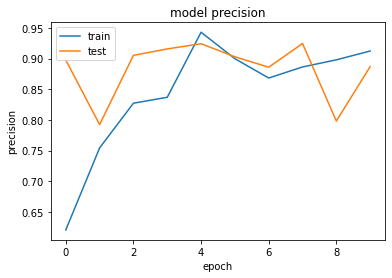

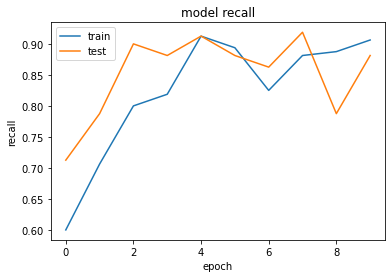

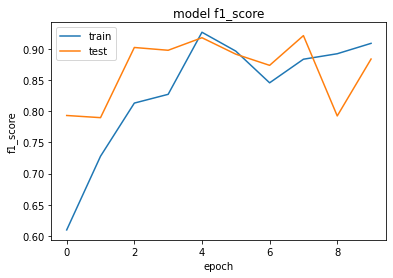

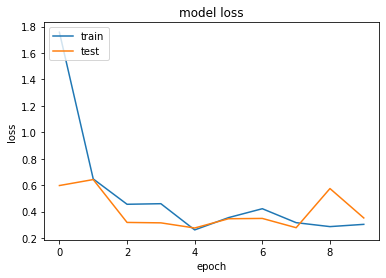

In [15]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

### Testamos com 2 épocas, 4 épocas, 8 épocas e por fim 10 épocas. A que mostrou uma convergência mais consistente foi justamente esta última.

### É possível verificar que existe uma ascendência dos valores de precisão, sensibilidade e pontuação f1 nos gráficos de treino e que tem uma proximidade com os dados de testes, além de percebermos uma estabilização da média de validação nas últimas épocas, ficando sempre acima de 70%. No caso do gráfico de perda, podemos perceber que é descendente, atingindo estabilidade nas últimas épocas.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

In [16]:
resnet50_val_precision_score = round(history.history['val_precision_score'][-1] * 100, 2)
resnet50_val_recall_score = round(history.history['val_recall_score'][-1] * 100, 2)
resnet50_val_f1_score = round(history.history['val_f1_score'][-1] * 100, 2)

display(Markdown("<span style='color:blue'>**Resposta:**</span>"))
print("Precisão (precision): " + str(resnet50_val_precision_score) + "%")
print("Sensibilidade (recall): " + str(resnet50_val_recall_score) + "%")
print("Pontuação de Validação (f1 score): " + str(resnet50_val_f1_score) + "%")
print()
print("Conforme a saída abaixo, onde é considerado apenas a última época:")
saida1.show()

<span style='color:blue'>**Resposta:**</span>

Precisão (precision): 88.69%
Sensibilidade (recall): 88.13%
Pontuação de Validação (f1 score): 88.4%

Conforme a saída:
Epoch 1/10
5/5 [==============================] - 18s 4s/step - loss: 1.7573 - precision_score: 0.6205 - recall_score: 0.6000 - f1_score: 0.6096 - val_loss: 0.5973 - val_precision_score: 0.8975 - val_recall_score: 0.7125 - val_f1_score: 0.7934
Epoch 2/10
5/5 [==============================] - 16s 3s/step - loss: 0.6471 - precision_score: 0.7543 - recall_score: 0.7063 - f1_score: 0.7279 - val_loss: 0.6425 - val_precision_score: 0.7923 - val_recall_score: 0.7875 - val_f1_score: 0.7899
Epoch 3/10
5/5 [==============================] - 17s 3s/step - loss: 0.4555 - precision_score: 0.8272 - recall_score: 0.8000 - f1_score: 0.8133 - val_loss: 0.3181 - val_precision_score: 0.9052 - val_recall_score: 0.9000 - val_f1_score: 0.9026
Epoch 4/10
5/5 [==============================] - 18s 4s/step - loss: 0.4598 - precision_score: 0.8369 - recall_score: 0.8188 - f1_score: 0.8274 - v

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

### A VGG16  ????????
A Arquitetura pode ser melhor entendida pela figura abaixo:

### Prós:  ????????

### Contras:  ????????

In [17]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [18]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [19]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [20]:
%%capture saida2 --no-stderr
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.


In [21]:
saida2.show()

Epoch 1/10
5/5 [==============================] - 43s 9s/step - loss: 2.5626 - precision_score: 0.4938 - recall_score: 0.4938 - f1_score: 0.4937 - val_loss: 1.7071 - val_precision_score: 0.6687 - val_recall_score: 0.6687 - val_f1_score: 0.6687
Epoch 2/10
5/5 [==============================] - 41s 8s/step - loss: 1.4395 - precision_score: 0.7437 - recall_score: 0.7437 - f1_score: 0.7437 - val_loss: 1.0912 - val_precision_score: 0.7937 - val_recall_score: 0.7937 - val_f1_score: 0.7937
Epoch 3/10
5/5 [==============================] - 42s 8s/step - loss: 1.1549 - precision_score: 0.8188 - recall_score: 0.8188 - f1_score: 0.8187 - val_loss: 1.3769 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 4/10
5/5 [==============================] - 42s 8s/step - loss: 0.6415 - precision_score: 0.8052 - recall_score: 0.8000 - f1_score: 0.8026 - val_loss: 0.5911 - val_precision_score: 0.8158 - val_recall_score: 0.7812 - val_f1_score: 0.7979
Epoch 5/10
5/5 [========

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

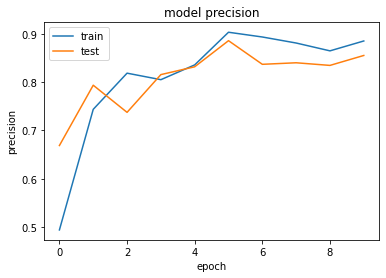

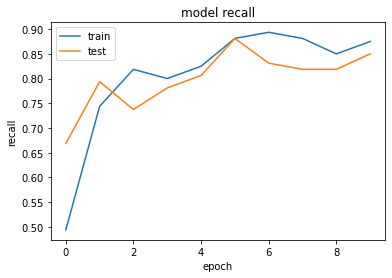

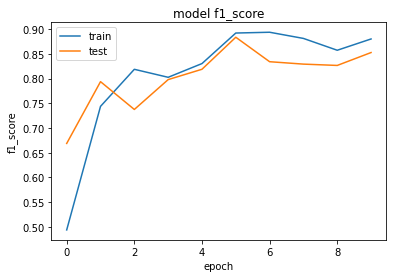

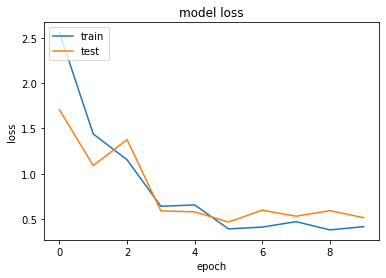

In [22]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

### Testamos com 2 épocas, 4 épocas, 8 épocas e por fim 10 épocas. A que mostrou uma convergência mais consistente foi justamente esta última.

### É possível verificar que existe uma ascendência dos valores de precisão, sensibilidade e pontuação f1 nos gráficos de treino e que tem uma proximidade com os dados de testes, além de percebermos uma estabilização nas últimas épocas. Comparando com a ResNet50, a VGG16 só mostrou essa estabilização maior à partir da 6a época. No caso do gráfico de perda, podemos perceber que é descendente, atingindo estabilidade nas últimas épocas também.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

In [23]:
vgg16_val_precision_score = round(history.history['val_precision_score'][-1] * 100, 2)
vgg16_val_recall_score = round(history.history['val_recall_score'][-1] * 100, 2)
vgg16_val_f1_score = round(history.history['val_f1_score'][-1] * 100, 2)

display(Markdown("<span style='color:blue'>**Resposta:**</span>"))
print("Precisão (precision): " + str(vgg16_val_precision_score) + "%")
print("Sensibilidade (recall): " + str(vgg16_val_recall_score) + "%")
print("Pontuação de Validação (f1 score): " + str(vgg16_val_f1_score) + "%")
print()
print("Conforme a saída abaixo, onde é considerado apenas a última época:")
saida2.show()

<span style='color:blue'>**Resposta:**</span>

Precisão (precision): 85.54%
Sensibilidade (recall): 85.0%
Pontuação de Validação (f1 score): 85.27%

Conforme a saída abaixo, onde é considerado apenas a última época:
Epoch 1/10
5/5 [==============================] - 43s 9s/step - loss: 2.5626 - precision_score: 0.4938 - recall_score: 0.4938 - f1_score: 0.4937 - val_loss: 1.7071 - val_precision_score: 0.6687 - val_recall_score: 0.6687 - val_f1_score: 0.6687
Epoch 2/10
5/5 [==============================] - 41s 8s/step - loss: 1.4395 - precision_score: 0.7437 - recall_score: 0.7437 - f1_score: 0.7437 - val_loss: 1.0912 - val_precision_score: 0.7937 - val_recall_score: 0.7937 - val_f1_score: 0.7937
Epoch 3/10
5/5 [==============================] - 42s 8s/step - loss: 1.1549 - precision_score: 0.8188 - recall_score: 0.8188 - f1_score: 0.8187 - val_loss: 1.3769 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 4/10
5/5 [==============================] - 42s 8s/step - loss: 0.6415 - precision_score: 0.8

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**:

### A VGG19  ????????
A Arquitetura pode ser melhor entendida pela figura abaixo:

### Prós:  ????????

### Contras:  ????????

In [28]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [29]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)  

In [30]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [31]:
%%capture saida3 --no-stderr
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

In [32]:
saida3.show()

Epoch 1/10
5/5 [==============================] - 53s 11s/step - loss: 2.6404 - precision_score: 0.5777 - recall_score: 0.5625 - f1_score: 0.5696 - val_loss: 1.1742 - val_precision_score: 0.7625 - val_recall_score: 0.7625 - val_f1_score: 0.7625
Epoch 2/10
5/5 [==============================] - 53s 11s/step - loss: 1.0458 - precision_score: 0.7812 - recall_score: 0.7812 - f1_score: 0.7812 - val_loss: 0.7240 - val_precision_score: 0.8625 - val_recall_score: 0.8625 - val_f1_score: 0.8625
Epoch 3/10
5/5 [==============================] - 53s 11s/step - loss: 0.5289 - precision_score: 0.8813 - recall_score: 0.8813 - f1_score: 0.8812 - val_loss: 0.7872 - val_precision_score: 0.8625 - val_recall_score: 0.8625 - val_f1_score: 0.8625
Epoch 4/10
5/5 [==============================] - 53s 11s/step - loss: 0.5357 - precision_score: 0.8554 - recall_score: 0.8500 - f1_score: 0.8527 - val_loss: 0.4540 - val_precision_score: 0.8540 - val_recall_score: 0.8438 - val_f1_score: 0.8488
Epoch 5/10
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

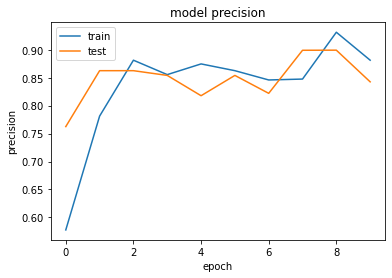

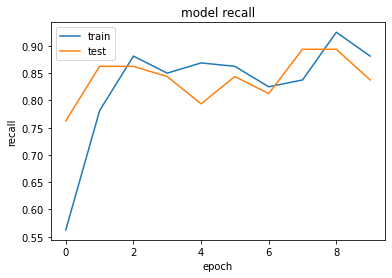

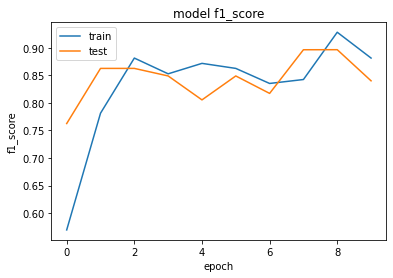

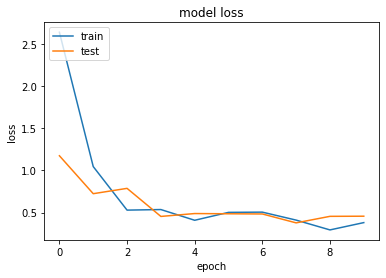

In [33]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**:

### Para este caso, testamos com 10 épocas diretamente. Mostrou também uma convergência mais consistente até a 8a época, quando passou ter uma variação maior, mas manteve-se com precisão e f1 acima de 70%.

### Comparando com a ResNet50 e a VGG16, a VGG19 mostrou um erro maior na validação, comparando os gráficos de Treino e Teste, mas assim como os demais, também mostra uma tendência de ascendência para precisão, sensibilidade e pontuação f1 e descendência para o gráfico de perda.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**:

In [34]:
vgg19_val_precision_score = round(history.history['val_precision_score'][-1] * 100, 2)
vgg19_val_recall_score = round(history.history['val_recall_score'][-1] * 100, 2)
vgg19_val_f1_score = round(history.history['val_f1_score'][-1] * 100, 2)

display(Markdown("<span style='color:blue'>**Resposta:**</span>"))
print("Precisão (precision): " + str(vgg19_val_precision_score) + "%")
print("Sensibilidade (recall): " + str(vgg19_val_recall_score) + "%")
print("Pontuação de Validação (f1 score): " + str(vgg19_val_f1_score) + "%")
print()
print("Conforme a saída abaixo, onde é considerado apenas a última época:")
saida3.show()

<span style='color:blue'>**Resposta:**</span>

Precisão (precision): 84.25%
Sensibilidade (recall): 83.75%
Pontuação de Validação (f1 score): 84.0%

Conforme a saída abaixo, onde é considerado apenas a última época:
Epoch 1/10
5/5 [==============================] - 53s 11s/step - loss: 2.6404 - precision_score: 0.5777 - recall_score: 0.5625 - f1_score: 0.5696 - val_loss: 1.1742 - val_precision_score: 0.7625 - val_recall_score: 0.7625 - val_f1_score: 0.7625
Epoch 2/10
5/5 [==============================] - 53s 11s/step - loss: 1.0458 - precision_score: 0.7812 - recall_score: 0.7812 - f1_score: 0.7812 - val_loss: 0.7240 - val_precision_score: 0.8625 - val_recall_score: 0.8625 - val_f1_score: 0.8625
Epoch 3/10
5/5 [==============================] - 53s 11s/step - loss: 0.5289 - precision_score: 0.8813 - recall_score: 0.8813 - f1_score: 0.8812 - val_loss: 0.7872 - val_precision_score: 0.8625 - val_recall_score: 0.8625 - val_f1_score: 0.8625
Epoch 4/10
5/5 [==============================] - 53s 11s/step - loss: 0.5357 - precision_score:

#### Apesar do valor de f1-score já ser dado pela função, vamos usar o cálculo do código abaixo, para demonstrar os valores no item 4.6, conforme fórmula descrita neste item, sendo dado por:
_2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

In [31]:

import pandas as pd

resnet50_f1_score_calc = round((2*resnet50_val_precision_score*resnet50_val_recall_score)/(resnet50_val_precision_score+resnet50_val_recall_score), 2)

vgg16_f1_score_calc = round((2*vgg16_val_precision_score*vgg16_val_recall_score)/(vgg16_val_precision_score+vgg16_val_recall_score),2)

vgg19_f1_score_calc = round((2*vgg19_val_precision_score*vgg19_val_recall_score)/(vgg19_val_precision_score+vgg19_val_recall_score),2)

Comparativo_Arquiteturas = pd.DataFrame(data=(['ResNet50', str(resnet50_val_precision_score) + ' %', str(resnet50_val_recall_score) + ' %', str(resnet50_val_f1_score) + ' %', str(resnet50_f1_score_calc) + ' %'],
                                       ['VGG16', str(vgg16_val_precision_score) + ' %', str(vgg16_val_recall_score) + ' %', str(vgg16_val_f1_score) + ' %', str(vgg16_f1_score_calc) + ' %'],
                                       ['VGG19', str(vgg19_val_precision_score) + ' %', str(vgg19_val_recall_score) + ' %', str(vgg19_val_f1_score) + ' %', str(vgg19_f1_score_calc) + ' %']),
                                        columns=['Modelo', 'Precisão (Precision)', 'Sensibilidade (Recall)', 'F1-Score', 'F1-Score Calculado'])


## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

In [32]:
Comparativo_Arquiteturas

,Modelo,Precisão (Precision),Sensibilidade (Recall),F1-Score,F1-Score Calculado
0,ResNet50,88.69 %,88.13 %,88.4 %,88.41 %
1,VGG16,85.54 %,85.0 %,85.27 %,85.27 %
2,VGG19,84.25 %,83.75 %,84.0 %,84.0 %


## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Resposta**:

## Conclusão ????????

## 4.8 Abordagem Extra

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [14]:
#IMPLEMENTE
from keras.applications import xception
from keras.applications.xception import preprocess_input

from keras import Model, layers
from keras.models import load_model, model_from_json

import keras.backend as K

### Vamos usar o modelo Xception, pois tem um depth bem maior que o VGG16 e VGG19, mas com um tamanho bem menor, menor inclusive que o Resnet50.

### Conforme figura abaixo:

<p align="center">
<img src="imagens/keras_modelos.png" height="20%" width="20%">
</p>

In [15]:
conv_base = Xception(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

In [16]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
_______________________________________________________________________________________

In [17]:
optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [18]:
%%capture saida4 --no-stderr
history = model.fit_generator(generator=train_generator, 
                              epochs=qtde_epocas, 
                              validation_steps=5, 
                              steps_per_epoch=5, 
                              validation_data=val_generator)

Instructions for updating:
Please use Model.fit, which supports generators.


In [19]:
saida4.show()

Epoch 1/10
5/5 [==============================] - 22s 4s/step - loss: 34.2798 - precision_score: 0.4563 - recall_score: 0.4563 - f1_score: 0.4562 - val_loss: 15.4155 - val_precision_score: 0.7500 - val_recall_score: 0.7500 - val_f1_score: 0.7500
Epoch 2/10
5/5 [==============================] - 20s 4s/step - loss: 15.1647 - precision_score: 0.7063 - recall_score: 0.7063 - f1_score: 0.7062 - val_loss: 9.7982 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 13.6672 - precision_score: 0.6625 - recall_score: 0.6625 - f1_score: 0.6625 - val_loss: 7.0599 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 6.7960 - precision_score: 0.8000 - recall_score: 0.8000 - f1_score: 0.8000 - val_loss: 10.1895 - val_precision_score: 0.7000 - val_recall_score: 0.7000 - val_f1_score: 0.7000
Epoch 5/10
5/5 [===

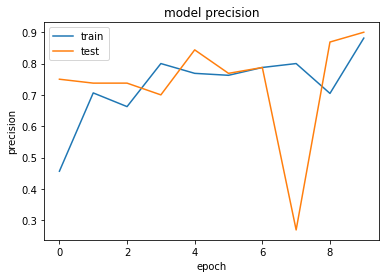

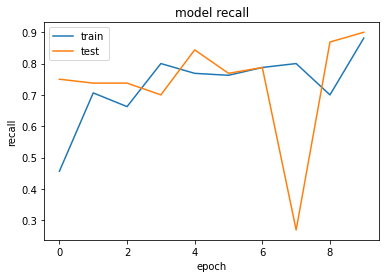

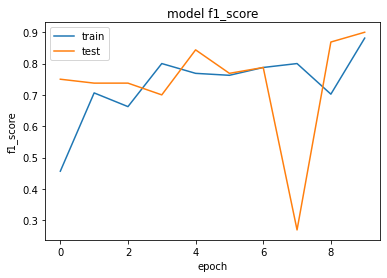

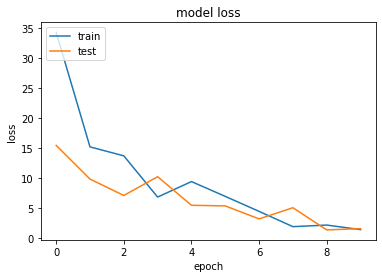

In [20]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
xception_val_precision_score = round(history.history['val_precision_score'][-1] * 100, 2)
xception_val_recall_score = round(history.history['val_recall_score'][-1] * 100, 2)
xception_val_f1_score = round(history.history['val_f1_score'][-1] * 100, 2)

display(Markdown("<span style='color:blue'>**Resposta:**</span>"))
print("Precisão (precision): " + str(xception_val_precision_score) + "%")
print("Sensibilidade (recall): " + str(xception_val_recall_score) + "%")
print("Pontuação de Validação (f1 score): " + str(xception_val_f1_score) + "%")
print()
print("Conforme a saída abaixo, onde é considerado apenas a última época:")
saida4.show()

<span style='color:blue'>**Resposta:**</span>

Precisão (precision): 90.0%
Sensibilidade (recall): 90.0%
Pontuação de Validação (f1 score): 90.0%

Conforme a saída abaixo, onde é considerado apenas a última época:
Epoch 1/10
5/5 [==============================] - 22s 4s/step - loss: 34.2798 - precision_score: 0.4563 - recall_score: 0.4563 - f1_score: 0.4562 - val_loss: 15.4155 - val_precision_score: 0.7500 - val_recall_score: 0.7500 - val_f1_score: 0.7500
Epoch 2/10
5/5 [==============================] - 20s 4s/step - loss: 15.1647 - precision_score: 0.7063 - recall_score: 0.7063 - f1_score: 0.7062 - val_loss: 9.7982 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 3/10
5/5 [==============================] - 20s 4s/step - loss: 13.6672 - precision_score: 0.6625 - recall_score: 0.6625 - f1_score: 0.6625 - val_loss: 7.0599 - val_precision_score: 0.7375 - val_recall_score: 0.7375 - val_f1_score: 0.7375
Epoch 4/10
5/5 [==============================] - 20s 4s/step - loss: 6.7960 - precision_score: 0

In [28]:
model.save('modelo-xception.hdf5')
model.save_weights('modelo-xception_pesos.hdf5')

### 4.8.1 Conclusões sobre a abordagem extra

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**:

In [33]:

xception_f1_score_calc = round((2*xception_val_precision_score*xception_val_recall_score)/(xception_val_precision_score+xception_val_recall_score),2)

mymodel_results = {'Modelo':'Xception',
                   'Precisão (Precision)': str(xception_val_precision_score) + ' %',
                   'Sensibilidade (Recall)': str(xception_val_recall_score) + ' %',
                   'F1-Score': str(xception_val_f1_score) + ' %',
                   'F1-Score Calculado': str(xception_f1_score_calc) + ' %'}
                            

Comparativo_Arquiteturas = Comparativo_Arquiteturas.append(mymodel_results, ignore_index=True)

Comparativo_Arquiteturas

,Modelo,Precisão (Precision),Sensibilidade (Recall),F1-Score,F1-Score Calculado
0,ResNet50,88.69 %,88.13 %,88.4 %,88.41 %
1,VGG16,85.54 %,85.0 %,85.27 %,85.27 %
2,VGG19,84.25 %,83.75 %,84.0 %,84.0 %
3,Xception,90.0 %,90.0 %,90.0 %,90.0 %


## ????????